In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol, diff, simplify
import sympy as sp
from sympy import *

# Решение нелинейных уравнений

Даны два уравнения $(\ln x)^2 -\frac{3}{4}\ln x+\frac{1}{8}=0$ и $(\ln x)^2-\ln x+\frac{1}{4}$. Найти с точностью $\epsilon = 10^{-10}$ все корни уравнений, содержащиеся на отрезке $[0.1, 2]$. Для решения задачи использовать метод бисекции.

In [6]:
X = Symbol('X')
sol1 = solve((sp.log(X))**2 - 3/4 * sp.log(X) + 1/8, X)
print('Solution: x1 =', sol1[0], ', x2 =', sol1[1])
sol2 = solve((sp.log(X))**2 - sp.log(X) + 1/4, X)
print('Solution: x =', sol2[0])
sol3 = solve(X**5 - 2.656764 * X**4 - 3.406111 * X**3 + 10.89372 * X**2 - 1.752935 * X - 3.423612, X)
print('Solution: ')
for i in range(len(sol3)):
    print(f'x{i+1} = ', sol3[i])
print('Solution: ')
for i in range(len(sol4)):
    print(f'x{i+1} = ', sol4[i])

Solution: x1 = 1.28402541668774 , x2 = 1.64872127070013
Solution: x = 1.64872127070013
Solution: 
x1 =  -1.95094920584874
x2 =  -0.469399302164049
x3 =  0.864354739050034
x4 =  1.77223421661594
x5 =  2.44052355234681
Solution: 
x1 =  -0.801280977770532
x2 =  2.60941887901996
x3 =  0.445931049375288 - 0.528595825331866*I
x4 =  0.445931049375288 + 0.528595825331866*I


In [8]:
def f(x):
    return (np.log(x))**2 - 3/4 * np.log(x) + 1/8

In [9]:
def g(x):
    return (np.log(x))**2 - np.log(x) + 1/4

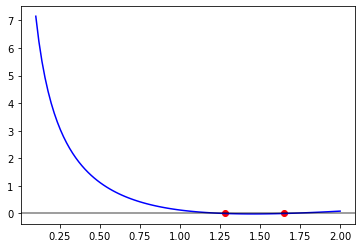

In [10]:
x = np.linspace(0.1, 2, 100)
plt.plot(x, f(x), c='blue')
ax = plt.gca()
ax.axhline(y=0, c='black', alpha=0.5)
plt.scatter(1.28402541668774, f(1.28402541668774), c='red')
plt.scatter(1.64872127070013, f(1.64872127070013), c='red')

# plt.scatter(np.sqrt(np.e), f(np.sqrt(np.e)), c='red')
# plt.scatter(np.e**0.25, f(np.e**0.25), c='red')

plt.show()

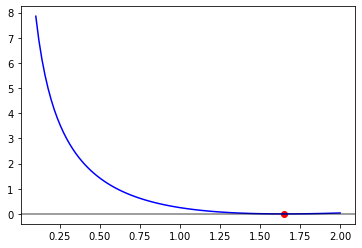

In [11]:
x = np.linspace(0.1, 2, 100)
plt.plot(x, g(x), c='blue')
ax = plt.gca()
ax.axhline(y=0, c='black', alpha=0.5)

plt.scatter(np.sqrt(np.e), g(np.sqrt(np.e)), c='red')

plt.show()

In [12]:
def bisec(f, a, b, eps):
    an = a
    bn = b
    k = 0
    while (bn - an) > 2 * eps:
        xn = (an + bn) / 2
        fa = f(an)
        fb = f(bn)
        fxn = f(xn)
        if fa * fxn <= 0:
            bn = xn
        else:
            an = xn
        k += 1
    xn = (an + bn) / 2
    res = [xn, k]
    return res

In [13]:
print('Root 1:', bisec(f, 1, 1.5, 1e-10)[0], '\nNumber of iterations:', bisec(f, 1, 1.5, 1e-10)[1])

Root 1: 1.284025416651275 
Number of iterations: 32


In [14]:
print('Root 2:', bisec(f, 1.5, 2, 1e-10)[0], '\nNumber of iterations:', bisec(f, 1.5, 2, 1e-10)[1])

Root 2: 1.6487212706706487 
Number of iterations: 32


In [15]:
print('Root:', bisec(g, 1.5, 2, 1e-10)[0], '\nNumber of iterations:', bisec(g, 1.5, 2, 1e-10)[1])

Root: 1.9999999999417923 
Number of iterations: 32


Локализовать корни уравнения $f(x)=x^5-2.656764x^4-3.406111x^3+10.89372x^2-1.752935x-3.423612=0$. Найти их с точностью $\varepsilon=10^{-8}$, используя методы простой итерации и Ньютона. Сравнить скорость сходимости методов (по числу итераций).

In [16]:
def f1(x):
    return x**5 - 2.656764 * x**4 - 3.406111 * x**3 + 10.89372 * x**2 - 1.752935 * x - 3.423612

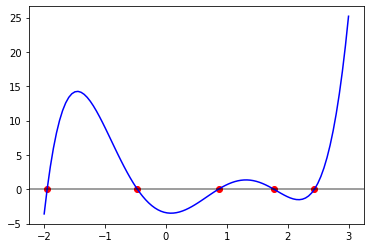

In [17]:
x = np.linspace(-2, 3, 100)
plt.plot(x, f1(x), c='blue')
ax = plt.gca()
ax.axhline(y=0, c='black', alpha=0.5)

solutions = [-1.95094920584874, -0.469399302164049, 0.864354739050034, 1.77223421661594, 2.44052355234681]

for sol in solutions:
    plt.scatter(sol, f1(sol), c='red')

plt.show()

In [18]:
def f2(x):
    return x**4 - 2.7 * x**3 + x - 1

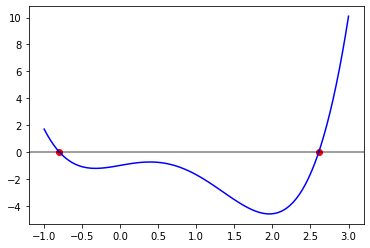

In [19]:
x = np.linspace(-1, 3, 100)
plt.plot(x, f2(x), c='blue')
ax = plt.gca()
ax.axhline(y=0, c='black', alpha=0.5)

solutions = [-0.801280977770532, 2.60941887901996]

for sol in solutions:
    plt.scatter(sol, f2(sol), c='red')

plt.show()

In [20]:
def newton(f0, x0, eps):
    
    df = diff(f0, X)
    xk = x0
    it = 0
    
    sol = []
    
    for i in range(100):
        xk = xk - f0.subs(X, xk) / df.subs(X, xk)
        xk = simplify(xk)
        it += 1
        sol.append(xk)
        if i !=0 :
            if abs(sol[i] - sol[i-1]) <= eps:
                break
    return [xk, it]

In [25]:
f0 = X**4 - 2.7 * X**3 + X - 1

In [32]:
x0 = [-1, 2.5, I, -I]

for i in range(len(x0)):
    print(f'x{i} =', newton(f0, x0[i], 1e-5)[0], ', number of iterations:', newton(f0, x0[i], 1e-5)[1])

x0 = -0.801280977770532 , number of iterations: 5
x1 = 2.60941887901997 , number of iterations: 4
x2 = 0.445931049375124 + 0.528595825331376*I , number of iterations: 6
x3 = 0.445931049375124 - 0.528595825331376*I , number of iterations: 6


In [103]:
g0 = X**5 - 2.656764 * X**4 - 3.406111 * X**3 + 10.89372 * X**2 - 1.752935 * X - 3.423612

In [34]:
x0 = [-2.5, -1, 1, 1.5, 2.5]

for i in range(len(x0)):
    print(f'x{i} =', newton(g0, x0[i], 1e-8)[0], ', number of iterations:', newton(g0, x0[i], 1e-8)[1])

x0 = -1.95094920584874 , number of iterations: 6
x1 = -0.469399302164049 , number of iterations: 5
x2 = 0.864354739050033 , number of iterations: 5
x3 = 1.77223421661594 , number of iterations: 5
x4 = 2.44052355234681 , number of iterations: 5


In [85]:
def f(x):
    return x**5 - 2.656764 * x**4 - 3.406111 * x**3 + 10.89372 * x**2 - 1.752935 * x - 3.423612

In [98]:
def df(x):
    return 5 * x**4 - 10.627056 * x**3 - 10.218333 * x**2 + 21.78744 * x - 1.752935

In [99]:
def simple_iteration(f, x0, eps):
    it = 0
    alpha = 0.01 * sign(df(x0))
    xk = x0
    sol = []
    for i in range(400):
        xk -= alpha * f(xk)
        it += 1
        sol.append(xk)
        if i != 0 :
            if abs(sol[i] - sol[i-1]) <= eps:
                break
    return [xk, it]

In [102]:
x0 = [-2, -1, 1, 2, 2.5]

for i in range(len(x0)):
    print(f'x{i} =', simple_iteration(f, x0[i], 10e-8)[0], ', number of iterations:', simple_iteration(f, x0[i], 10e-8)[1])

x0 = -1.95094924702877 , number of iterations: 12
x1 = -0.469399939781588 , number of iterations: 96
x2 = 0.864356464615222 , number of iterations: 206
x3 = 1.77223608293269 , number of iterations: 225
x4 = 2.44052418395508 , number of iterations: 78
